# Volume 4: Finite Element Method
    <Name>
    <Class>
    <Date>

In [1]:
import scipy as sp
from scipy.sparse import spdiags, csr_matrix, diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.

Implement the function FEM(x, eps, alpha, beta) and use it to solve the differential equation.

In [2]:
alpha = 2
beta = 4
epsilon = 0.02

def analytic_solution(x):
    """Calculates the analytic solution"""
    return alpha + x + (beta - alpha - 1)*(np.exp(x/epsilon)-1)/(np.exp(1/epsilon)-1)


x_linspace = np.linspace(0,1,101)
sol = analytic_solution(x_linspace)


In [3]:
def FEM(x, eps, alpha, beta):
    """ PARAMS:
    x (ndarray, (N+1)) - grid points to solve the ODE on (they might not be evenly-spaced)
    eps (float) - parameter in the ODE
    alpha (float) - left Dirichlet condition
    beta (float) - right Dirichlet condition
    """
    # Get length of x
    n = len(x)
    
    # Get h-array
    h = x[1:] - x[:-1]
    
    # Create left diagonal
    left_diagonal = np.array([eps / h[i] + 0.5 for i in range(0, n -2)] + [0])
    
    # Create middle diagonal 
    middle_diagonal = np.array([1] + [-eps/h[i-1] - eps / h[i] for i in range(1, n-1)] + [1])
    
    # Create right diagonal
    right_diagonal = np.array([0] + [eps / h[i-1] - 0.5 for i in range(2,n)])
    
    # Create diagonals and offsets
    diagonals = [left_diagonal, middle_diagonal, right_diagonal]
    offsets = [-1,0,1]
    
    # Solve for A
    A = diags(diagonals, offsets, shape = (n,n))
    
    # Solve for Phi and subsequently K
    Phi = np.array([alpha] + [-0.5 * (h[i] + h[i+1]) for i in range(0,n-2)] + [beta])
    K = spsolve(A, Phi)
    
    # Return desired value
    return K
    

/Users/user/Local/Deep_Learning_Project/.conda/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


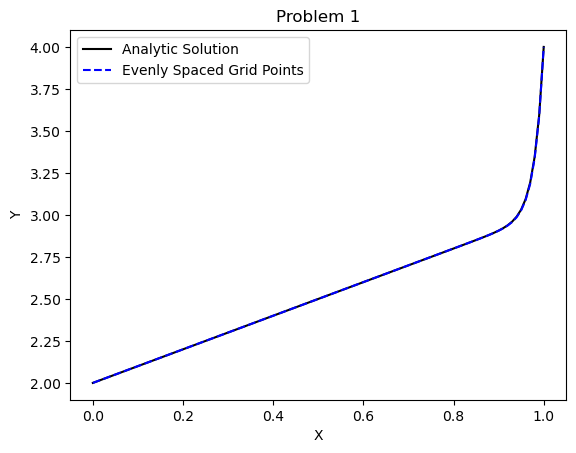

In [4]:
# Define variables
x = np.linspace(0,1,100)
sol = analytic_solution(x_linspace)
eps = 0.02
alpha = 2
beta = 4

# Solve for K
K = FEM(x,eps, alpha, beta)

# Plot data
plt.plot(x_linspace, sol, 'k-', label = 'Analytic Solution')
plt.plot(x,K, 'b--', label = 'Evenly Spaced Grid Points')
plt.legend()
plt.title('Problem 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

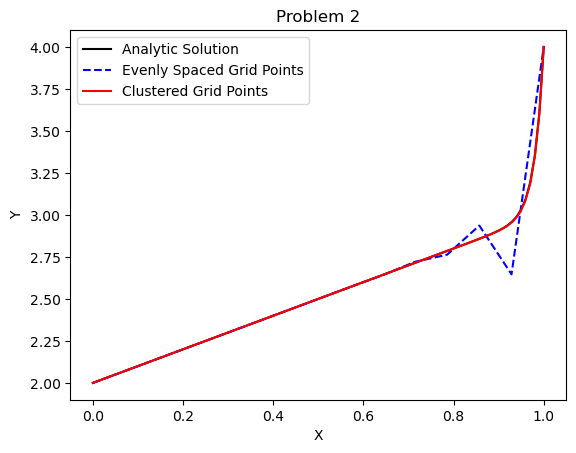

In [5]:
# Define constants
x = np.linspace(0,1,15)
sol = analytic_solution(x_linspace)
eps = 0.02
alpha = 2
beta = 4

# Initialize evenly and unevenly space grid points
even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1/8)

# Run FEM on both of these grid points
K_even = FEM(even_grid,eps, alpha, beta)
K_clustered = FEM(clustered_grid, eps, alpha, beta)

# Plot the data
plt.plot(x_linspace, sol, 'k-', label = 'Analytic Solution')
plt.plot(even_grid,K_even, 'b--', label = 'Evenly Spaced Grid Points')
plt.plot(clustered_grid, K_clustered, 'r-', label = 'Clustered Grid Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Problem 2')
plt.legend()
plt.show()


# Problem 3

Solve 

$\epsilon y'' - y' = -1$

$y(0)=\alpha, y(1)=\beta$

with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

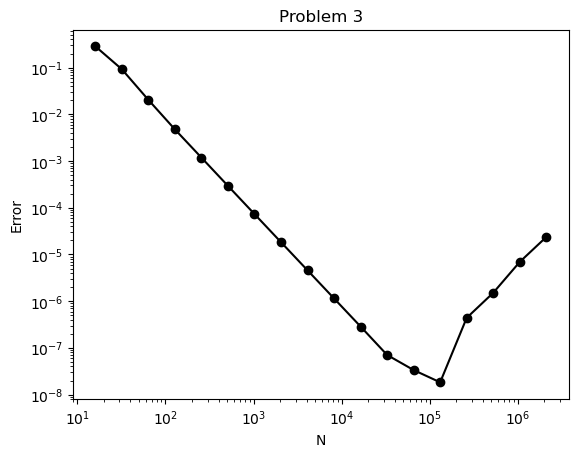

In [7]:
# Define what N evenly-spaced finite elements we have
N = [2**i for i in range(4,22,1)]

I = [i for i in range(4,22,1)]


# Initialize a list of max abs errors
max_abs_error = []

# Iterate through all N
for n in N:
    # Find approximate and true solutions
    x_linspace = np.linspace(0,1,n)
    K = FEM(x_linspace, eps, alpha, beta)
    sol = analytic_solution(x_linspace)
    
    # Find maximum absolute value of the differences in solutions
    max_error = np.max(np.abs(sol - K))
    max_abs_error.append(max_error)
    
    
# Plot data
plt.loglog(N, max_abs_error, 'k-', marker = 'o')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Problem 3')
plt.show()
    